# Toolbox Demo

This notebook will cover the basic usage of the toolbox to numerically simulate color glass condensates. There are explicit implementations of the method for SU(2) and SU(3), as well as a generic implementation for SU(n).

In [1]:
# Import our functions
import cgc

# Import numpy and matplotlib for plotting/other utility
import matplotlib.pyplot as plt
import numpy as np

# Make our plots nice and large
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 12

## Two Color Demo

This example explores the simplified SU(2) case.

(10, 3, 128, 128)
(10, 3, 128, 128)
(10, 3, 128, 128)


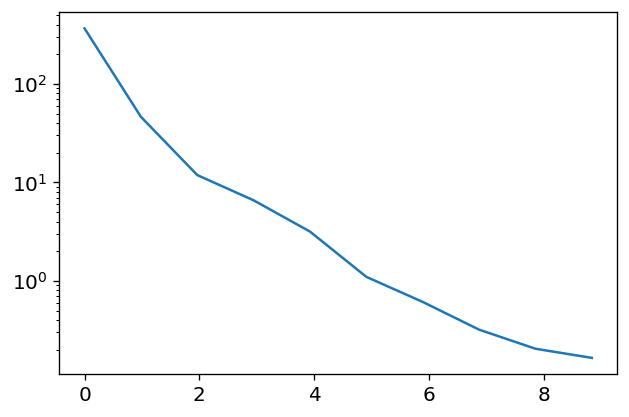

In [2]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .1
mu = 2
radius = 1

# Create a nucleus and proton object
nucleus = cgc.Nucleus(2, N, delta, mu, longitudinalLayers=10)
# Note that we have to specify color charges for the proton
# but not for the nucleus, since this implementation of
# nucleus is specific to two colors
proton = cgc.Proton(2, N, delta, mu, radius)

# Create a collision using these two objects
# The order doesn't matter here, it will determine which is which
# based on which implements wilsonLine()
#col = cgc.Collision(proton, nucleus)
col = cgc.Collision(nucleus, proton)

# Plot the number of particles produced vs. their momenta
# Note that we can calculate the intermediary quantities (eg. the Wilson Line)
# but we don't have to; the number of calculations done will be
# the same either way
plt.plot(col.momentaBins(), col.particlesProduced())
plt.yscale('log')
plt.show()

## Three Color Demo

Note that the code is almost exactly the same as before, except that we just specify that we are looking at SU(3) instead of SU(2).

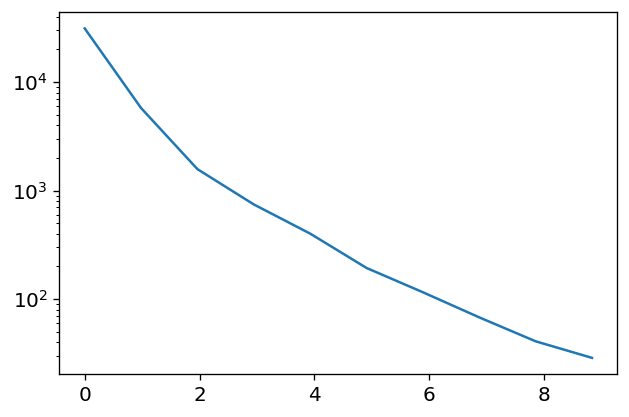

In [3]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .1
mu = 2
radius = 1

# Create a nucleus and proton object
nucleus = cgc.Nucleus(3, N, delta, mu)
# Note that we have to specify color charges for the proton
# but not for the nucleus, since this implementation of
# nucleus is specific to three colors
proton = cgc.Proton(3, N, delta, mu, radius)

# Create a collision using these two objects
# The order doesn't matter here, it will determine which is which
# based on which implements wilsonLine()
#col = cgc.Collision(proton, nucleus)
col = cgc.Collision(nucleus, proton)

# Plot the number of particles produced vs. their momenta
# Note that we can calculate the intermediary quantities (eg. the Wilson Line)
# but we don't have to; the number of calculations done will be
# the same either way
plt.plot(col.momentaBins(), col.particlesProduced())
plt.yscale('log')
plt.show()

## Arbitrary Color Demo

Again, note that the code is almost exactly the same as above.

This time, we will also examine some intermediary quantities.

In [2]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .1
mu = 2
radius = 1

# Create a nucleus and proton object
nucleus = cgc.Nucleus(3, N, delta, mu, longitudinalLayers=10)
proton = cgc.Proton(3, N, delta, mu, radius)

# Create a collision using these two objects
# The order doesn't matter here, it will determine which is which
# based on which implements wilsonLine()
#col = cgc.Collision(proton, nucleus)
col = cgc.Collision(nucleus, proton)

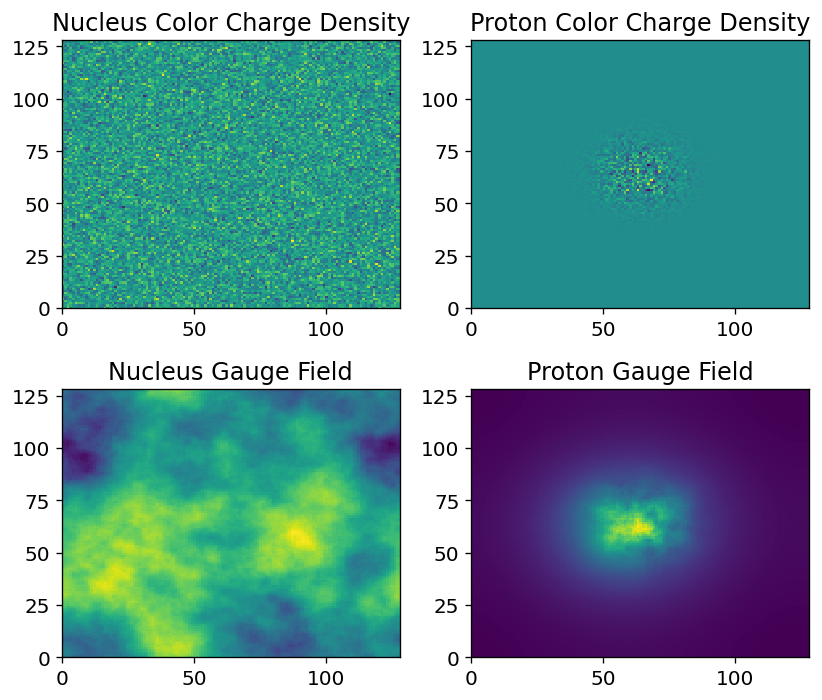

In [3]:
# Let's see what the color density and gauge fields look like
# (Only 2 of them; showing all 8 is a little excessive)
fig, ax = plt.subplots(2, 2, figsize=(7, 6))

# We have a total of colorCharges**2 - 1 (8 in this case) fields we could
# look at for both objects. Feel free to change this up to look at a
# different one (though they should all look the same on average)
fieldSelect = 0
layerSelect = 0

ax[0,0].pcolor(nucleus.colorChargeField()[layerSelect,fieldSelect])
ax[0,0].set_title("Nucleus Color Charge Density")
ax[1,0].pcolor(nucleus.gaugeField()[layerSelect,fieldSelect])
ax[1,0].set_title("Nucleus Gauge Field")

ax[0,1].pcolor(proton.colorChargeField()[fieldSelect])
ax[0,1].set_title("Proton Color Charge Density")
ax[1,1].pcolor(proton.gaugeField()[fieldSelect])
ax[1,1].set_title("Proton Gauge Field")


fig.tight_layout()
plt.show()

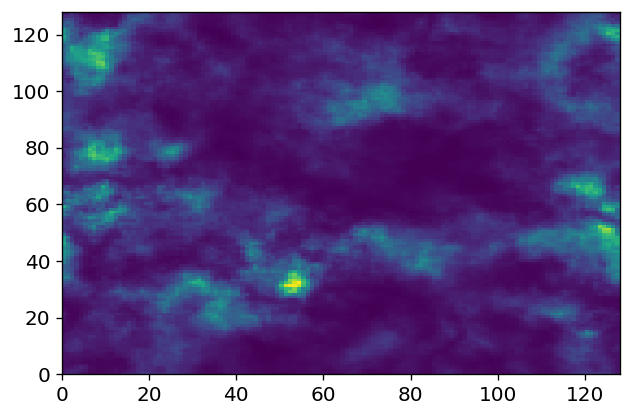

In [4]:
# We can also look at the wilson line (or rather, the trace of it in the adjoint
# representation)
adjointWilsonLineTrace = np.trace(nucleus.adjointWilsonLine(), axis1=0, axis2=1)
plt.pcolor(np.abs(adjointWilsonLineTrace))
plt.show()

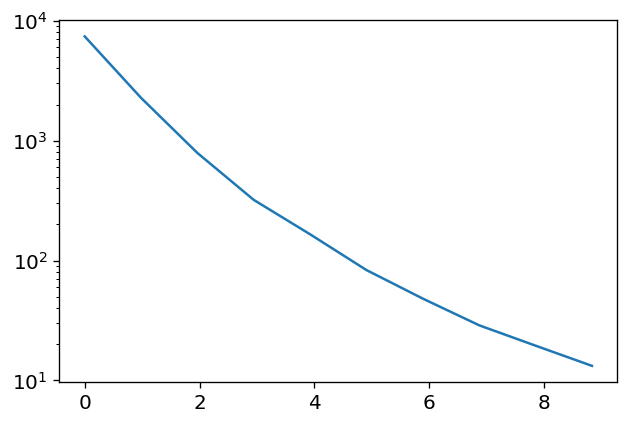

In [7]:
# And finally plot the particles and their momenta, as before
plt.plot(col.momentaBins(), col.particlesProduced())
plt.yscale('log')
plt.show()

## Mixing Special Unitary Groups

The toolbox has resilience to accidentally combining objects that could not coexist, for both the specific 2 and 3 color objects, as well as the arbitrary object.

In [8]:
N = 128
delta = .1
mu = 2
radius = 1

# Create a nucleus and proton object using different number of color charges
nucleus = cgc.Nucleus(3, N, delta, mu)
proton = cgc.Proton(2, N, delta, mu, radius)

# This won't work (but it will tell you why!)
col = cgc.Collision(nucleus, proton)

Exception: Wavefunctions implement different gluon degrees of freedom (number of color charges): 3 vs. 8

In [9]:
N = 128
delta = .1
mu = 2
radius = 1

# Create a nucleus and proton object using different number of color charges
nucleus = cgc.Nucleus(5, N, delta, mu)
proton = cgc.Proton(3, N, delta, mu, radius)

# This won't work (but it will tell you why!)
col = cgc.Collision(nucleus, proton)

Exception: Wavefunctions implement different gluon degrees of freedom (number of color charges): 8 vs. 24